<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

#### 1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [7]:
# Eliminar columnas que no tienen una variable cuantitativa
aux_cols = important_cols[:]
aux_cols.remove('year')
aux_cols.remove('ISO_code')
aux_cols.remove('countries')
aux_cols.remove('region')

In [8]:
dataset[aux_cols].describe()

,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,6.785610,76.973149,6.993444,77.007983
std,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,0.883601,44.540142,1.025811,44.506549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.880000,1.000000,3.765827,1.000000
25%,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.250000,38.000000,6.336685,39.000000
50%,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,6.900000,77.000000,6.923840,76.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.410000,115.000000,7.894660,115.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.190000,162.000000,9.126313,162.000000


In [9]:
# Rango de las variables
dataset[aux_cols].apply(lambda x: x.max() - x.min())


pf_identity_legal                 10.000000
pf_identity_parental_marriage     10.000000
pf_identity_parental_divorce      10.000000
pf_identity_parental              10.000000
pf_identity_sex_male              10.000000
pf_identity_sex_female            10.000000
pf_identity_sex                   10.000000
pf_identity_divorce               10.000000
pf_identity                       10.000000
ef_score                           6.310000
ef_rank                          161.000000
hf_score                           5.360486
hf_rank                          161.000000
dtype: float64

**Las variables estudiadas**:

*-pf_identity_legal*

(Género legal: mide el grado en que las personas son libres de cambiar legalmente su sexo y género)



-*pf_identity_parental_marriage* 

-*pf_identity_parental_divorce* 

-*pf_identity_parental*

(Se refieren a la medida en que las mujeres tienen los mismos derechos basados en la ley y la costumbre con respecto a la “tutela legal de un niño durante un matrimonio y los derechos de custodia de un niño después del divorcio)

-*pf_identity_sex_male*

-*pf_identity_sex_female*

-*pf_identity_sex*

(Califican la libertad de los individuos para establecer relaciones entre personas del mismo sexo)

-*pf_identity_divorce*

(Mide si las mujeres y los hombres tienen los mismos derechos para iniciar el divorcio)

-*pf_identity*

(Mide la libertad de identidad y de relaciones)


El **rango** para todas las variables **pf_identity** con un valor de 10 puntos se considera como de amplia dispersión en las puntuaciones entre los distintos valores de los registros de cada país; teniendo en cuenta que las puntuaciones válidas van desde el 0 al 10. Lo que indica que existen países sin libertad de identidad y de relaciones, y países con total libertad.

#### 1.2 Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [10]:
df_pf_identity = dataset['pf_identity']
df_hf_score = dataset['hf_score']

world_pf_identity_mean = df_pf_identity.mean()
world_pf_identity_median = df_pf_identity.median()
world_pf_identity_standard_deviation = df_pf_identity.std()

world_hf_score_mean = df_hf_score.mean()
world_hf_score_median = df_hf_score.median()
world_hf_score_standard_deviation = df_hf_score.std()

df_la_and_c_pf_identity = dataset[dataset['region'].isin(['Latin America & the Caribbean'])]['pf_identity']
df_la_and_c_hf_score = dataset[dataset['region'].isin(['Latin America & the Caribbean'])]['hf_score']

la_and_car_pf_identity_mean = df_la_and_c_pf_identity.mean()
la_and_car_pf_identity_median = df_la_and_c_pf_identity.median()
la_and_car_pf_identity_standard_deviation = df_la_and_c_pf_identity.std()

la_and_car_hf_score_mean = df_la_and_c_hf_score.mean()
la_and_car_hf_score_median = df_la_and_c_hf_score.median()
la_and_car_hf_score_standard_deviation = df_la_and_c_hf_score.std()


print(f'pf_identity: \n World: \n -Mean: {world_pf_identity_mean} \n -Median: {world_pf_identity_median} \n -Standard Deviation: {world_pf_identity_standard_deviation}')
print('\n' f'Latin America & the Caribbean: \n -Mean: {la_and_car_pf_identity_mean} \n -Median: {la_and_car_pf_identity_median} \n -Standard Deviation: {la_and_car_pf_identity_standard_deviation}')

print('\n' f'hf_score: \n World: \n -Mean: {world_hf_score_mean} \n -Median: {world_hf_score_median} \n -Standard Deviation: {world_hf_score_standard_deviation}')
print('\n' f'Latin America & the Caribbean: \n -Mean: {la_and_car_hf_score_mean} \n -Median: {la_and_car_hf_score_median} \n -Standard Deviation: {la_and_car_hf_score_standard_deviation}')

pf_identity: 
 World: 
 -Mean: 7.33417997096807 
 -Median: 9.166666667000001 
 -Standard Deviation: 3.159472661477449

Latin America & the Caribbean: 
 -Mean: 8.765086206909483 
 -Median: 10.0 
 -Standard Deviation: 1.7117319741534658

hf_score: 
 World: 
 -Mean: 6.9934437555145 
 -Median: 6.923840432999999 
 -Standard Deviation: 1.0258111611874141

Latin America & the Caribbean: 
 -Mean: 7.047981929952582 
 -Median: 7.02804474 
 -Standard Deviation: 0.6089040915687837


**pf_identity:**
Los valores de media y mediana de la región de Latinoamérica y el Caribe son más altos que el valor mundial. Esto indica que en nuestra región se cuenta con mayores libertades de identidad y relaciones que en comparación a la libertad mundial.

Por otro lado, se puede observar que el valor de dispersión mundial es alto en relación a su media, encontrando que los valores de  puntuación son muy dispersos; ya que su media ronda el valor de 7,3 (en un intervalo de 0 a 10) y su desviacion estándar es de 3,15, obteniéndose un coeficiente de variación de un 43%. En síntesis, los países no tienen mucha uniformidad en las puntuaciones de "pf_identity".


**hf_score:**
Los valores de media y mediana de la región de Latinoamérica y el Caribe se asemejan al valor mundial; nuestra puntuación se encuentra ligeramente por encima de la puntuación mundial.

Ahora si analizamos el "hf_score", tenemos una desviación estándar de 1,02 es bastante más aceptable para una media de casi 7 (DS/Mean < 15%, nos indica cierta uniformidad en la puntuciones).
Más adelante se analiza por región y año y se observa que separando dicha información, si se pueden encontrar diferencias.

Tras el análisis anterior, se puede observar que América Latina y el Caribe se encuentran por encima de la media tanto en la identidad como en el nivel de libertad, a su vez que los datos para ésta región están más uniformes: todos los países pertenecientes a dicha región han tenido a nivel general en el periodo 2008-2016 un score de libertad parecidos, a primera instancia, no se observan grandes polaridades entre paises vecinos.

In [11]:
world_pf_identity_mode = df_pf_identity.mode().iloc[0]
world_hf_score_mode = df_hf_score.mode().iloc[0]

la_and_car_pf_identity_mode = df_la_and_c_pf_identity.mode().iloc[0]
la_and_car_hf_score_mode = df_la_and_c_hf_score.mode().iloc[0]

print(f'World mode: \n -pf_identity: {world_pf_identity_mode} \n -hf_score: {world_hf_score_mode}')
print('\n' f'Latin America & the Caribbean mode: \n -pf_identity: {la_and_car_pf_identity_mode} \n -hf_score: {la_and_car_hf_score_mode}')

## Saber si tiene sentido el calculo de la Moda


World mode: 
 -pf_identity: 10.0 
 -hf_score: 3.765826877

Latin America & the Caribbean mode: 
 -pf_identity: 10.0 
 -hf_score: 4.2007244560000006


Encontramos que para una variable continua la moda no nos aporta información valiosa, es mejor en esos casos un intervalo modal.

El calculo del valor de la moda tiene mayo sentido cuando se trata de variables categóricas, discretas o una variable continua organizada en intervalos de valores.

####   1.3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

Son directamente comparables ya que ambos poseen el mismo rango (10) y toman valores de 0 a 10

 #### 1.4. ¿Cómo pueden sanearse los valores faltantes?

Primero buscar datos NaN para ambas features, y despues analizar su contexto. Como ambas son variables numéricas (de origen no-random), podemos:

a) si el conjunto de datos no tiene mucha dispersión, normalizar todos los valores (u=0, ds=1), utilizar la técnica de los vecinos más cercanos, y asignarle el valor del vecino que está a menor distancia

b) designarle el valor de la media/moda/mediana de acuerdo al contexto para no aplicar un valor muy sesgado

c) si la muestra es muy grande, puede simplente eliminarse, ya que unos registros menos no infuirían en los cálculos totales: si [Cant NaN / total de registros] < 2% por ejemplo, se pueden omitir dichos valores de esas columnas.
Si para un país no existe ningun dato, podría eliminarse directamente la fila, ya que está ensuciando demasiado los datos, y hace más engorrosos los cálculos numéricos que pueden fallar al no ser un valor de esa naturaleza.


#### 1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32

In [12]:
def detect_outliers_z_score(serie):
    threshold=3
    mean = serie.mean()
    std = serie.std()
    outliers = []
    for item in serie:
        z_score= (item - mean)/std 
        if numpy.abs(z_score) > threshold:
            outliers.append(item)
    return outliers

In [13]:
def detect_outliers_iqr(serie):
  sorted(serie)
  q1, q3 = serie.quantile([0.25,0.75])  
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr)
  outliers = []
  for item in serie:
    if item > upper_bound or item < lower_bound:
      outliers.append(item)
  return outliers

In [14]:
print(f'Outliers world with Z score: \n hf_score: {detect_outliers_z_score(df_hf_score)} \n pf_identity: {detect_outliers_z_score(df_pf_identity)}')
print('\n' f'Outliers world with IQR: \n hf_score: {detect_outliers_iqr(df_hf_score)} \n pf_identity: {detect_outliers_iqr(df_pf_identity)}')

Outliers world with Z score: 
 hf_score: [3.765826877, 3.9108264289999997] 
 pf_identity: []

Outliers world with IQR: 
 hf_score: [3.765826877, 3.9108264289999997] 
 pf_identity: []


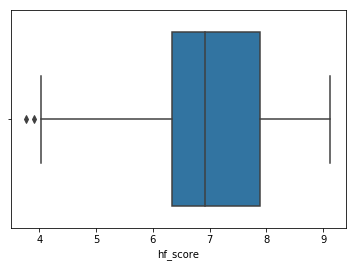

In [15]:
seaborn.boxplot(x=df_hf_score)

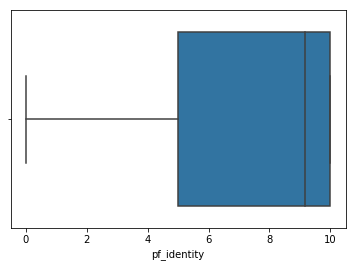

In [16]:
seaborn.boxplot(x=df_pf_identity)

Se realizó la detección de  los outliers con ambos métodos, se calcularon analiticamente la existencia o no de "outliers", y ambos arrojaron exactamente los mismos resultados.

Para comprobar visualmente, se utilizó un gráfico de caja para cada variable, en los cuales los valores atipicos(outliers) son los puntos identificados fuera de los valores extremos (bigotes); los cuales coinciden con los valores determinados arriba.

Sin embargo, el método de las puntuaciones Z es generalmente utilizado para variables que siguen una distribución normal; y el método del IQR para distribuciones no paramétricas de la variable.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

2.1 Grafiquen la media de la variable pf_identity y hf_score a través de los años.

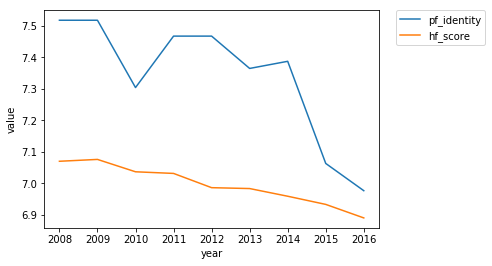

In [17]:
df_year_mean = dataset.groupby(dataset['year'])[['pf_identity', 'hf_score']].mean()
seaborn.lineplot(data=df_year_mean, x=df_year_mean.index, y='pf_identity', label='pf_identity')
seaborn.lineplot(data=df_year_mean, x=df_year_mean.index, y='hf_score', label='hf_score')
plt.ylabel('value')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2.2 Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

In [18]:
df_year_region_mean = dataset.groupby([dataset.year, dataset.region])[['pf_identity', 'hf_score']].mean()
df_year_region_mean

pf_identity  hf_score
year region                                              
2008 Caucasus & Central Asia           9.500000  7.027743
     East Asia                        10.000000  7.741378
     Eastern Europe                    9.880952  7.710244
     Latin America & the Caribbean     8.900000  7.118196
     Middle East & North Africa        3.653846  6.342013
     North America                    10.000000  8.550634
     Oceania                           9.375000  8.008484
     South Asia                        5.833333  6.451640
     Sub-Saharan Africa                4.785714  6.157588
     Western Europe                   10.000000  8.381446
2009 Caucasus & Central Asia           9.500000  7.025672
     East Asia                        10.000000  7.723779
     Eastern Europe                    9.880952  7.719634
     Latin America & the Caribbean     8.900000  7.113860
     Middle East & North Africa        3.653846  6.304318
     North America                    10.000000  8.449922
     Oceania                           9.375000  7.887855
     South Asia                        5.833333  6.552607
     Sub-Saharan Africa                4.785714  6.207078
     Western Europe                   10.000000  8.330795
2010 Caucasus & Central Asia           9.583333  6.975023
     East Asia                        10.000000  7.769861
     Eastern Europe                    9.880952  7.696403
     Latin America & the Caribbean     8.942308  7.087213
     Middle East & North Africa        2.941176  6.259184
     North America                    10.000000  8.450481
     Oceania                           9.375000  7.928538
     South Asia                        6.166667  6.652849
     Sub-Saharan Africa                4.736842  6.246401
     Western Europe                   10.000000  8.335004
...                                         ...       ...
2014 Caucasus & Central Asia           8.611111  6.849528
     East Asia                        10.000000  7.862007
     Eastern Europe                    9.761905  7.675139
     Latin America & the Caribbean     9.006410  7.015536
     Middle East & North Africa        2.361111  5.915510
     North America                    10.000000  8.524919
     Oceania                           9.375000  7.815776
     South Asia                        5.539216  6.477795
     Sub-Saharan Africa                6.128049  6.292692
     Western Europe                    9.907407  8.426261
2015 Caucasus & Central Asia           7.972222  6.772257
     East Asia                         9.375000  7.852107
     Eastern Europe                    9.190476  7.623544
     Latin America & the Caribbean     7.919872  6.979706
     Middle East & North Africa        2.393519  5.820231
     North America                     9.250000  8.449421
     Oceania                           9.000000  7.856745
     South Asia                        5.612745  6.474168
     Sub-Saharan Africa                6.237805  6.301390
     Western Europe                    9.513889  8.416442
2016 Caucasus & Central Asia           7.972222  6.773409
     East Asia                         9.375000  7.849527
     Eastern Europe                    9.136364  7.545715
     Latin America & the Caribbean     8.016026  6.954305
     Middle East & North Africa        2.267544  5.758610
     North America                     9.250000  8.477259
     Oceania                           9.000000  7.878301
     South Asia                        5.612745  6.467668
     Sub-Saharan Africa                6.009921  6.265716
     Western Europe                    9.513889  8.367332

[90 rows x 2 columns]

In [19]:
df_year_region_mean_reset = df_year_region_mean.reset_index(level=[0,1])
df_year_region_mean_reset

,year,region,pf_identity,hf_score
0,2008,Caucasus & Central Asia,9.500000,7.027743
1,2008,East Asia,10.000000,7.741378
2,2008,Eastern Europe,9.880952,7.710244
3,2008,Latin America & the Caribbean,8.900000,7.118196
4,2008,Middle East & North Africa,3.653846,6.342013
5,2008,North America,10.000000,8.550634
6,2008,Oceania,9.375000,8.008484
7,2008,South Asia,5.833333,6.451640
8,2008,Sub-Saharan Africa,4.785714,6.157588
9,2008,Western Europe,10.000000,8.381446


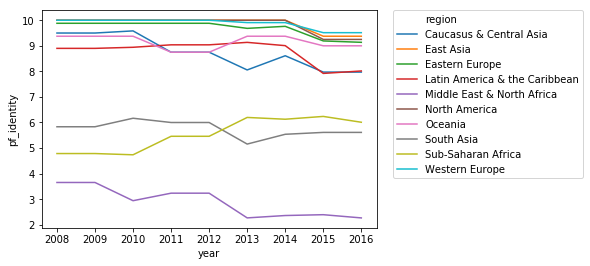

In [20]:
seaborn.lineplot(data=df_year_region_mean_reset, x='year', y='pf_identity', hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

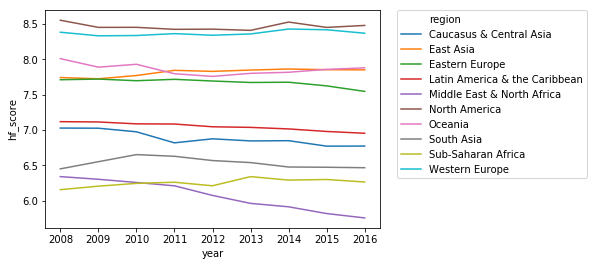

In [21]:
seaborn.lineplot(data=df_year_region_mean_reset, x='year', y='hf_score', hue='region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

La tendencia observada si es la misma que si trabajamos por regiones

2.3 Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

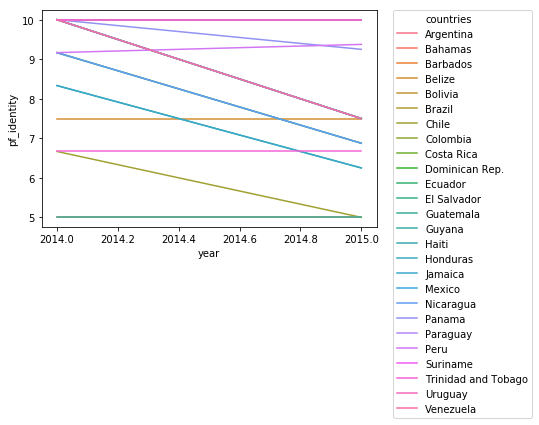

In [22]:
df_countries_2014_2015 = dataset[
    (dataset['region']=='Latin America & the Caribbean') & 
    (dataset['year'].isin(['2014', '2015']))
]
seaborn.lineplot(data=df_countries_2014_2015, x='year', y='pf_identity', hue='countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

3.1 Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

/Users/Ricky/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


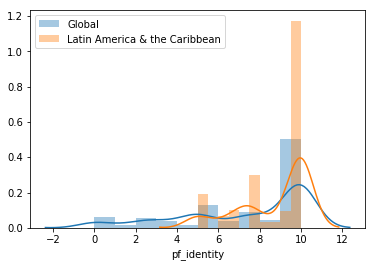

In [23]:
# pf_identity
seaborn.distplot(label='Global', a=dataset.dropna(subset=['pf_identity']).pf_identity, bins=10)
seaborn.distplot(label='Latin America & the Caribbean', a=dataset.loc[dataset.region == 'Latin America & the Caribbean'].dropna(subset=['pf_identity']).pf_identity, bins=10)
plt.legend()

/Users/Ricky/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


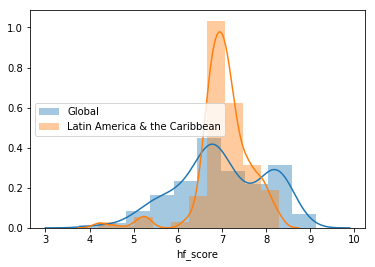

In [24]:
# hf_score
seaborn.distplot(label='Global', a=dataset.dropna(subset=['hf_score']).hf_score, bins=10)
seaborn.distplot(label='Latin America & the Caribbean', a=dataset.loc[dataset.region == 'Latin America & the Caribbean'].dropna(subset=['hf_score']).hf_score, bins=10)
plt.legend()

3.2 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [25]:
from scipy import stats

In [26]:
# En el caso de que digamos que sean normales
stats.kstest(dataset.pf_identity.dropna(), 'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

In [27]:
stats.kstest(dataset.hf_score.dropna(), 'norm')

KstestResult(statistic=0.9999170006054449, pvalue=0.0)

3.3 Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 0.,  0.,  0., ..., nan, nan, nan])),
 (nan, nan, nan))

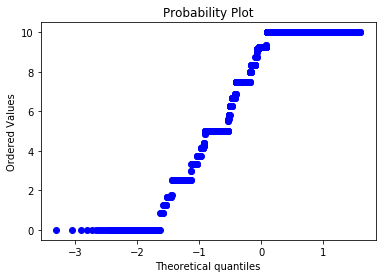

In [28]:
stats.probplot(dataset.pf_identity, dist='norm', plot=seaborn.mpl.pyplot)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([3.76582688, 3.91082643, 4.02359519, ...,        nan,        nan,
                nan])),
 (nan, nan, nan))

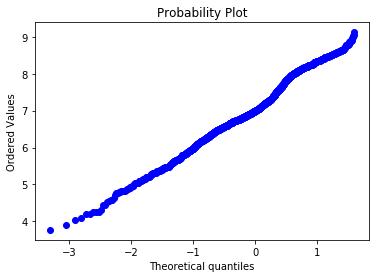

In [29]:
stats.probplot(dataset.hf_score, dist='norm', plot=seaborn.mpl.pyplot)

/Users/Ricky/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


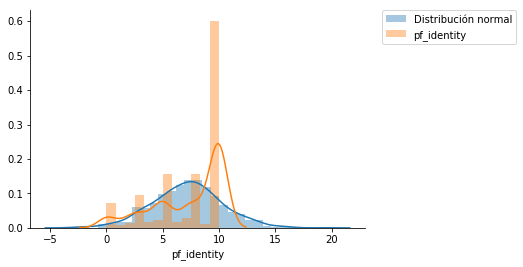

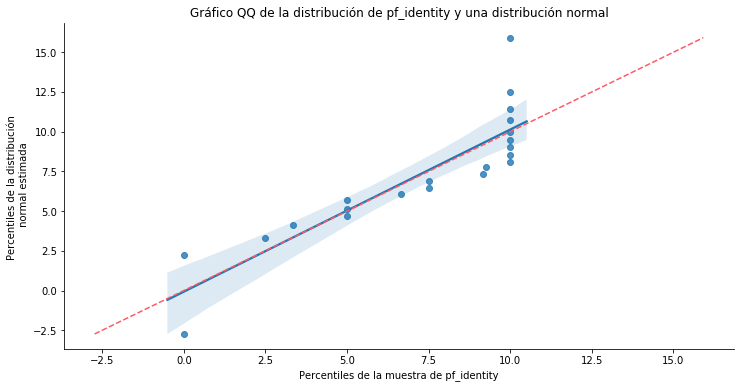

In [30]:
# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit(dataset.pf_identity.dropna())
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset.pf_identity.dropna(), label='pf_identity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset.pf_identity.dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset.pf_identity.dropna())), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#FF5964", ls="--")

seaborn.despine()

/Users/Ricky/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


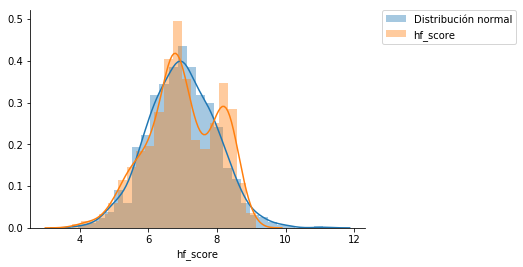

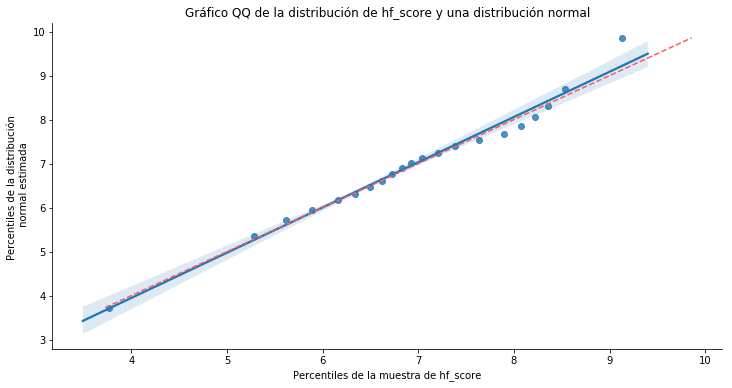

In [31]:
# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit(dataset.hf_score.dropna())
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset.hf_score.dropna(), label='hf_score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset.hf_score.dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset.hf_score.dropna())), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de hf_score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#FF5964", ls="--")

seaborn.despine()

3.4 Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [32]:
# pf_identity
print(f'pf_identity skewness: {stats.skew(dataset.pf_identity.dropna())}')
print(f'pf_identity kurtosis: {stats.kurtosis(dataset.pf_identity.dropna())}')

pf_identity skewness: -0.9121780542847563
pf_identity kurtosis: -0.4148322234251629


In [33]:
print(f'hf_score skewness: {stats.skew(dataset.hf_score.dropna())}')
print(f'hf_score kurtosis: {stats.kurtosis(dataset.hf_score.dropna())}')

hf_score skewness: -0.21205190437691196
hf_score kurtosis: -0.5101904315124792


## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


4.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

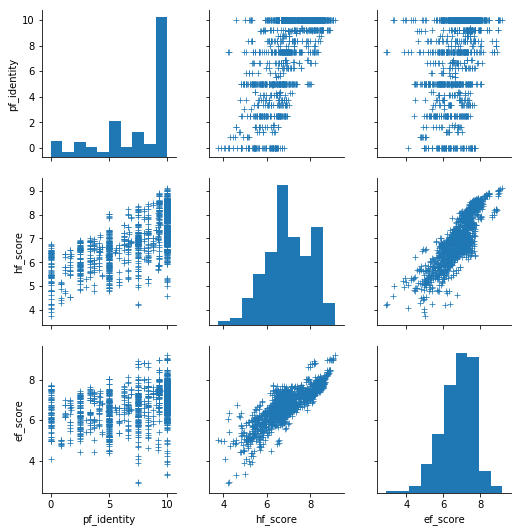

In [34]:
seaborn.pairplot(
    data=dataset[['pf_identity','hf_score', 'ef_score']].dropna(),
    vars=['pf_identity', 'hf_score','ef_score'],
    markers='+')

4.2 Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

In [35]:
df_pf_identity_ef_score = dataset[['pf_identity','ef_score']].dropna()
df_pf_identity_hf_score = dataset[['pf_identity','hf_score']].dropna()

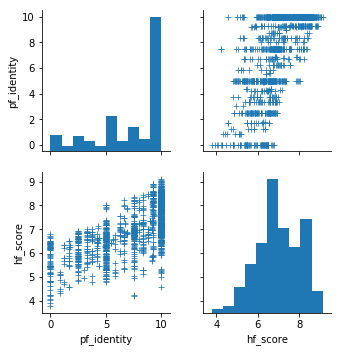

In [36]:
seaborn.pairplot(
    data=df_pf_identity_hf_score,
    vars=['pf_identity', 'hf_score'],
    markers='+')

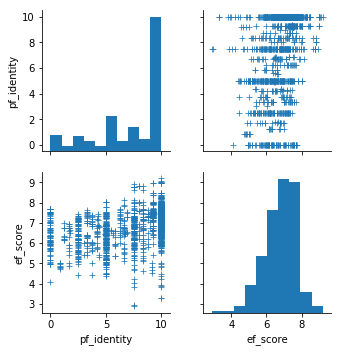

In [37]:
seaborn.pairplot(
    data=df_pf_identity_ef_score,
    vars=['pf_identity', 'ef_score'],
    markers='+')

4.3 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.

In [38]:
# pearson hf_score
stats.pearsonr(df_pf_identity_hf_score.pf_identity, df_pf_identity_hf_score.hf_score)

(0.6777541950437671, 5.585297684192347e-186)

In [39]:
# pearson ef_score
stats.pearsonr(df_pf_identity_ef_score.pf_identity, df_pf_identity_ef_score.ef_score)

(0.38887723797145607, 5.624766418674552e-51)

In [40]:
# kendalltau hf_score
stats.kendalltau(df_pf_identity_hf_score.pf_identity, df_pf_identity_hf_score.hf_score)

KendalltauResult(correlation=0.5213095523555771, pvalue=3.65763160993025e-157)

In [41]:
# kendalltau ef_score
stats.kendalltau(df_pf_identity_ef_score.pf_identity, df_pf_identity_ef_score.ef_score)

KendalltauResult(correlation=0.3081198391156437, pvalue=5.9188485315603625e-56)